# 인구소멸위기지역 - 시각화 (Part 3)

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [3]:
pop = pd.read_csv('data/시군구_ID부여.csv', encoding='euc-kr')
pop.head()

,광역시도,시군구,20-39세계,20-39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,소멸위기고위험지역,ID
0,강원도,강릉시,47006,21807,43830,211643,105025,106618,0.497536,True,False,강릉
1,강원도,고성군,5217,2042,7755,26792,13864,12928,0.263314,True,False,고성(강원)
2,강원도,동해시,18727,8258,17572,89814,45572,44242,0.469952,True,False,동해
3,강원도,삼척시,13583,6117,16077,65623,33275,32348,0.380481,True,False,삼척
4,강원도,속초시,18080,8171,15170,81497,40312,41185,0.538629,False,False,속초


- 지도 모양 보기

In [4]:
map_raw = pd.read_excel('data/draw_korea_raw(2021).xlsx')
map_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,광명,서울 은평,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 만안,서울 강서,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,안양 동안,서울 양천,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,NaN,인천 계양,시흥,서울 금천,서울 영등포,서울 서초,서울 강남,성남 중원,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 상록,서울 구로,서울 관악,과천,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 미추홀,안산 단원,군포,의왕,수원 권선,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [6]:
map_raw.stack()[:10]

0  7         철원
   8         화천
   9         양구
   10    고성(강원)
1  3         양주
   4        동두천
   5         연천
   6         포천
   7        의정부
   8         인제
dtype: object

In [7]:
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)
map.shape

(250, 3)

In [8]:
map.head()

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [9]:
map.columns = ['y', 'x', 'ID']
map.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


- 광역시 경계를 포함하여 그리기

In [10]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

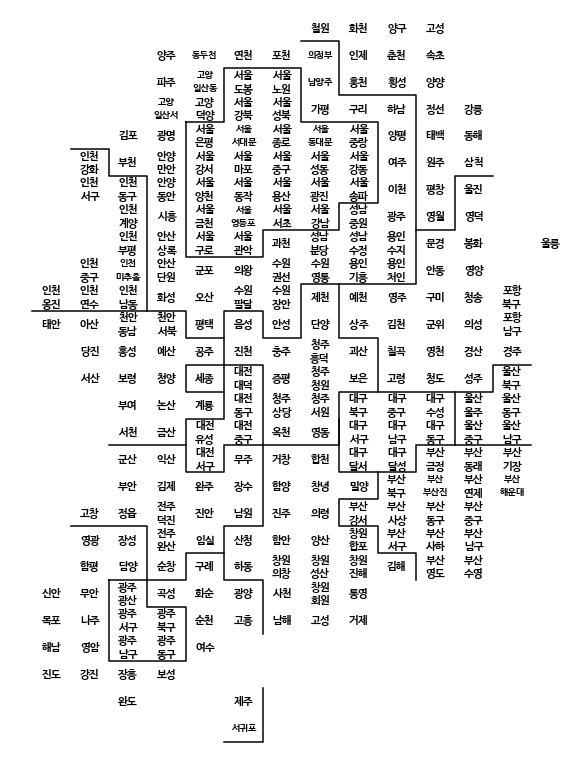

In [11]:
plt.figure(figsize=(8,11))

for idx, row in map.iterrows():
    # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
    # (중구, 서구 등)
    if len(row.ID.split())==2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
    elif row.ID[:2]=='고성':
        dispname = '고성'
    else:
        dispname = row.ID

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

- pop, map 합치기

In [12]:
pop.shape, map.shape

((250, 12), (250, 3))

In [13]:
pop = pd.merge(pop, map)        # on='ID'
pop.head()

,광역시도,시군구,20-39세계,20-39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,소멸위기고위험지역,ID,y,x
0,강원도,강릉시,47006,21807,43830,211643,105025,106618,0.497536,True,False,강릉,3,11
1,강원도,고성군,5217,2042,7755,26792,13864,12928,0.263314,True,False,고성(강원),0,10
2,강원도,동해시,18727,8258,17572,89814,45572,44242,0.469952,True,False,동해,4,11
3,강원도,삼척시,13583,6117,16077,65623,33275,32348,0.380481,True,False,삼척,5,11
4,강원도,속초시,18080,8171,15170,81497,40312,41185,0.538629,False,False,속초,1,10


### 인구 현황 및 인구소멸 위기지역 확인

- 시군구별 인구

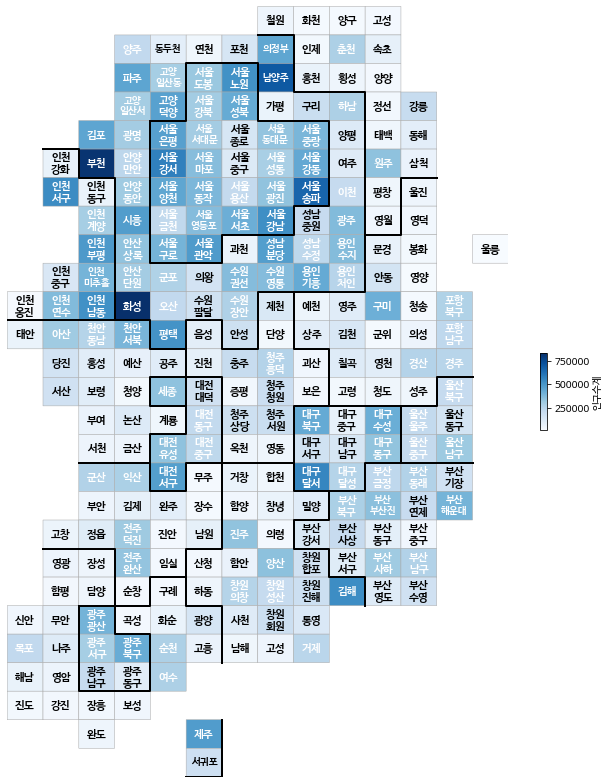

In [14]:
drawKorea('인구수계', pop, 'Blues')

- 인구소멸 위기 비율

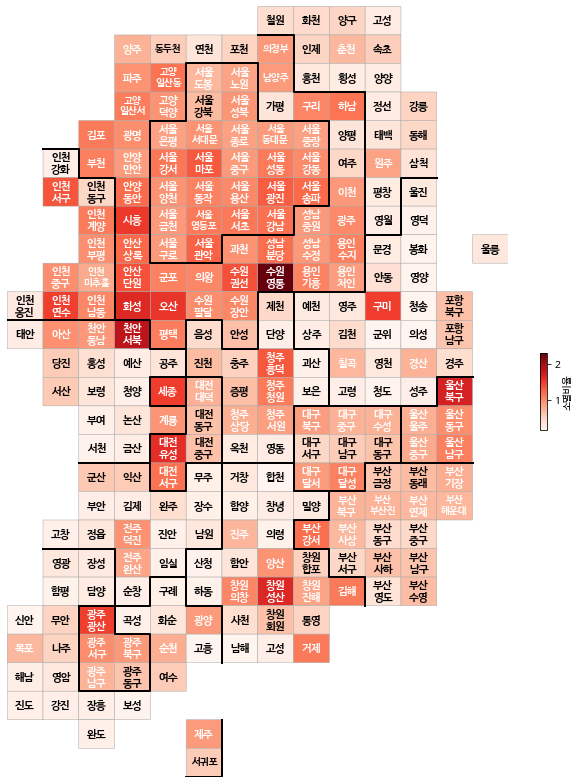

In [15]:
drawKorea('소멸비율', pop, 'Reds')

- 인구소멸 위기지역

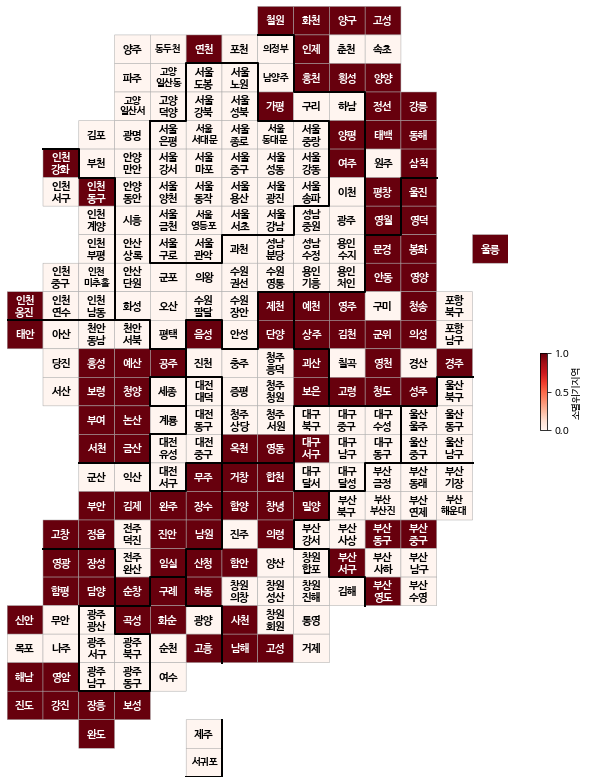

In [16]:
pop.소멸위기지역 = pop.소멸위기지역.astype(int)
drawKorea('소멸위기지역', pop, 'Reds')

- 여성인구 확인

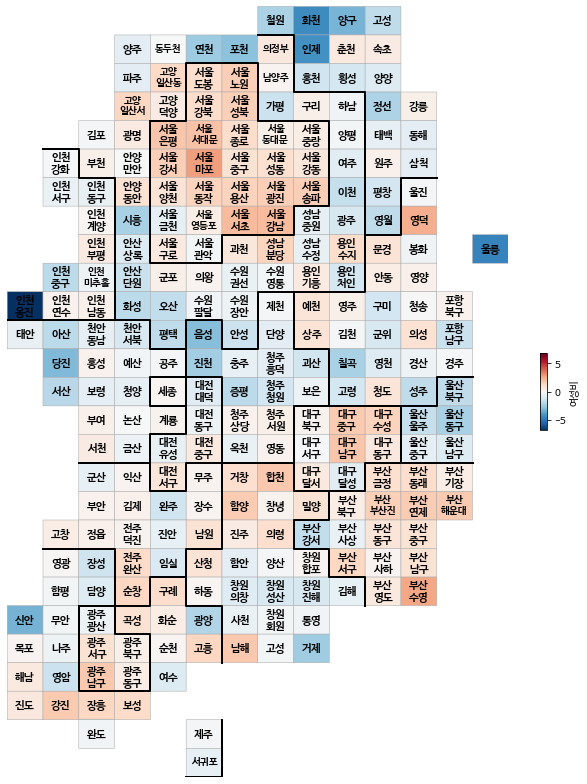

In [17]:
pop['여성비'] = (pop['인구수여자'] / pop['인구수계'] - 0.5) * 100
drawKoreaMinus('여성비', pop, 'RdBu_r')

- 20-30대 여성인구 비율

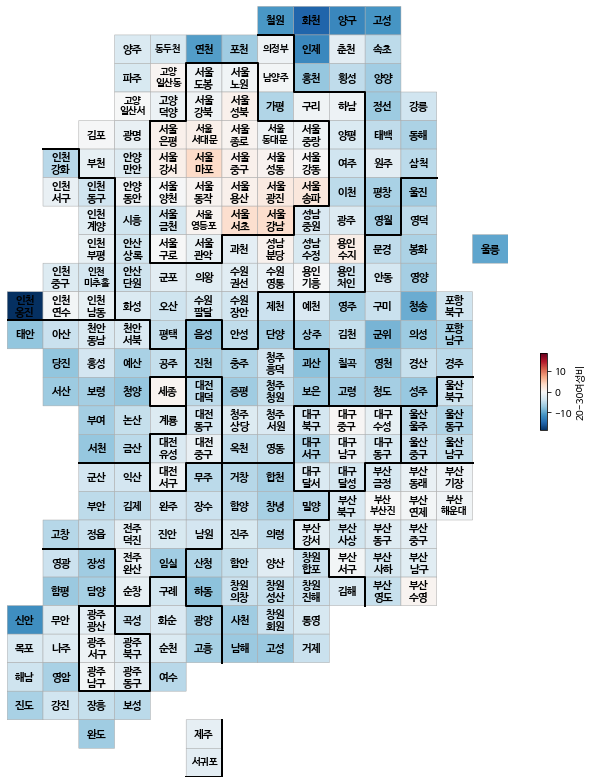

In [18]:
pop['20-30여성비'] = (pop['20-39세여자'] / pop['20-39세계'] - 0.5) * 100
drawKoreaMinus('20-30여성비', pop, 'RdBu_r')

In [19]:
pop.to_csv('data/시군구_최종.csv', index=False, encoding='euc-kr')